In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('F:/datasets')

In [13]:
df = pd.read_csv('Social_Network_Ads.csv')
df=df.iloc[:,2:]
df.sample()

,Age,EstimatedSalary,Purchased
389,48,35000,1


# Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.2,random_state=17)
X_train.shape, X_test.shape

((320, 2), (80, 2))

# Standard Sclar

In [40]:
from sklearn.preprocessing import StandardScaler # return numpy array given dataframe as input
scalar = StandardScaler()
scalar.fit(X_train)
scalar.mean_ # mean of age and salary respectively 

array([3.7828125e+01, 7.0371875e+04])

In [45]:
X_train_scale = scalar.transform(X_train)
X_test_scale = scalar.transform(X_test)

#### Conversion of numpy array to dataframe

In [49]:
X_train_df=pd.DataFrame(X_train_scale,columns=X_train.columns)
X_test_df=pd.DataFrame(X_test_scale,columns=X_test.columns)
X_train_df

,Age,EstimatedSalary
0,1.067754,0.104412
1,2.119082,0.910213
2,-0.079148,-0.442381
3,1.067754,-0.902838
4,-0.079148,0.277084
...,...,...
315,1.067754,2.032578
316,0.972179,-1.075510
317,-0.748175,0.536091
318,0.016427,-0.327267


#### The difference between non scaled and scaled data

In [50]:
np.round(X_train.describe(),1) # rounds off to 1 decimal place

,Age,EstimatedSalary
count,320.0,320.0
mean,37.8,70371.9
std,10.5,34802.5
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [51]:
np.round(X_train_df.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.3


### Effect of scaling

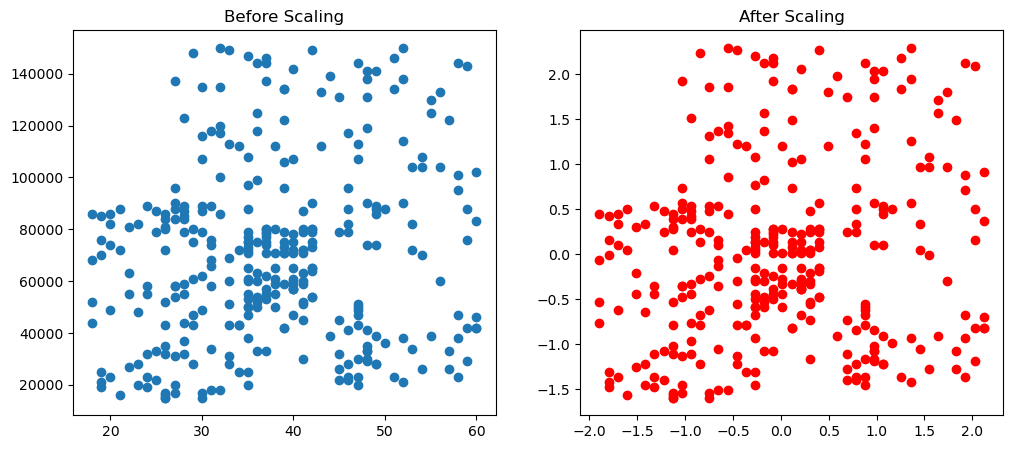

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_df['Age'], X_train_df['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

### Comparison of distribution

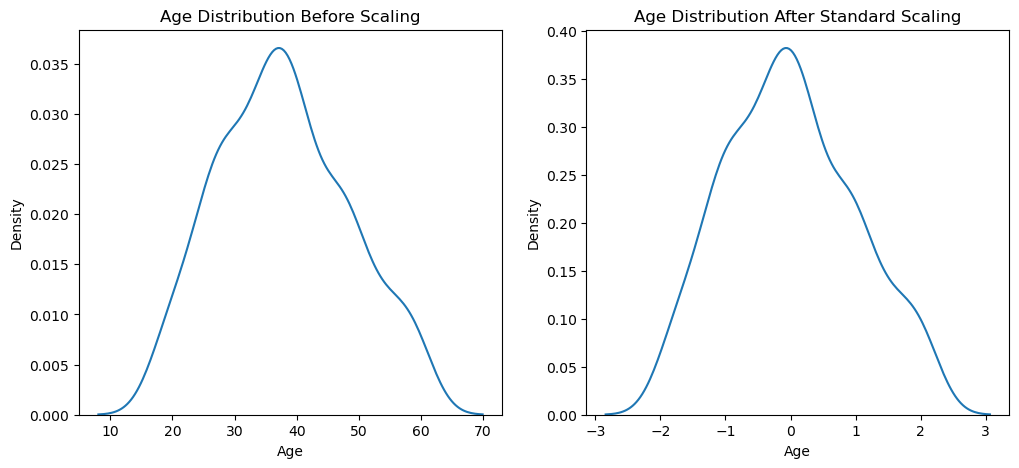

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_df['Age'], ax=ax2)
plt.show()

<Axes: title={'center': 'Salary after scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

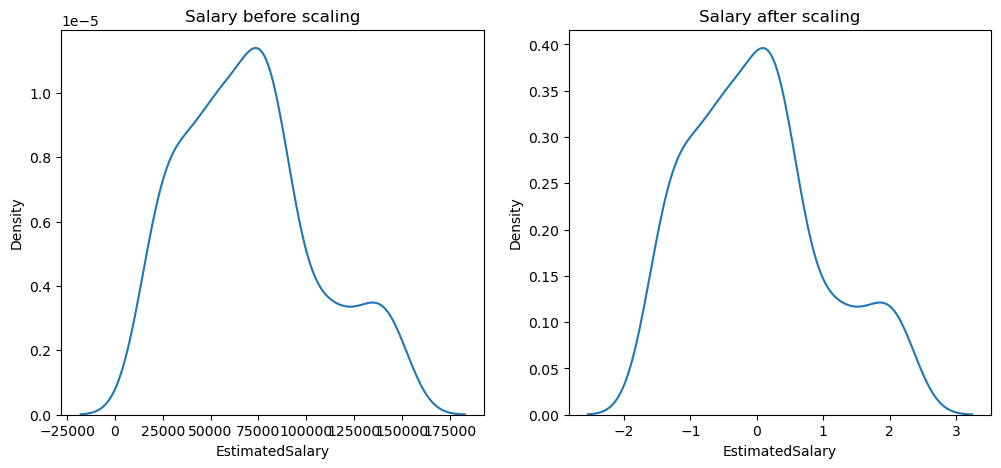

In [70]:
fig , (g1,g2) = plt.subplots(ncols=2, figsize=(12,5))
#before scaling
g1.set_title('Salary before scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=g1)

#after scaling
g2.set_title('Salary after scaling')
sns.kdeplot(X_train_df['EstimatedSalary'],ax=g2)